In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# параметры распределений
mu0, cov0 = [-2., -1.], [[2., 0.], [0., 1.]]
mu1, cov1 = [3., 1.], [[1., 0.], [0., 2.]]

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.MultivariateNormal(torch.tensor(mu0), torch.tensor(cov0))
d1 = torch.distributions.MultivariateNormal(torch.tensor(mu1), torch.tensor(cov1))

In [5]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.0190, -0.1214]), tensor(-0.4377)]


In [6]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.808486
Ошибка после 1 итераций: 0.309163
Ошибка после 2 итераций: 0.203921
Ошибка после 3 итераций: 0.161332
Ошибка после 4 итераций: 0.137212
Ошибка после 5 итераций: 0.123462
Ошибка после 6 итераций: 0.112904
Ошибка после 7 итераций: 0.104454
Ошибка после 8 итераций: 0.098242
Ошибка после 9 итераций: 0.093892
Ошибка после 10 итераций: 0.090208
Ошибка после 11 итераций: 0.086196
Ошибка после 12 итераций: 0.083776
Ошибка после 13 итераций: 0.081649
Ошибка после 14 итераций: 0.079168
Ошибка после 15 итераций: 0.076392
Ошибка после 16 итераций: 0.075442
Ошибка после 17 итераций: 0.072961
Ошибка после 18 итераций: 0.072506
Ошибка после 19 итераций: 0.071290


In [7]:
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.dstack((x, y))
d0_mv = stats.multivariate_normal(mu0, cov0)
d0_pdf = d0_mv.pdf(pos)
d1_mv = stats.multivariate_normal(mu1, cov1)
d1_pdf = d1_mv.pdf(pos)
x_tensor = torch.tensor(pos, dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

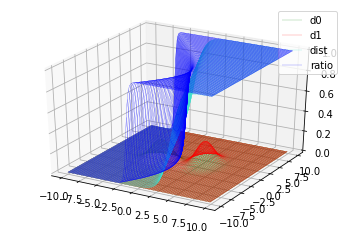

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(30, 180)
ax.plot_wireframe(x, y, d0_pdf*2, label='d0', color='green', rcount=100, ccount=100, linewidth=0.2) # умножение на 2 для красоты графиков, на распределения не влияет
ax.plot_wireframe(x, y, d1_pdf*2, label='d1', color='red', rcount=100, ccount=100, linewidth=0.2)   # умножение на 2 для красоты графиков, на распределения не влияет
ax.plot_wireframe(x, y, dist.reshape(200, 200), label='dist', color='turquoise', rcount=100, ccount=100, linewidth=0.2)
ax.plot_wireframe(x, y, ratio, label='ratio', color='blue', rcount=100, ccount=100, linewidth=0.2)
plt.legend();

In [9]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.4400, 0.5843]), tensor(-0.5454)]
